In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import gapipes as gp

In [2]:
import astropy.coordinates as coord

In [3]:
ngc104 = coord.SkyCoord.from_name('NGC 104')

In [48]:
pm = [7.26, -1.25]    # [pmra, pmdec], mas/yr

In [23]:
q = """
select *
from gaiadr2.gaia_source g
where 1=contains(point('', g.ra, g.dec), circle('', {ra}, {dec}, {radius_deg}))
""".format(ra=ngc104.ra.value, dec=ngc104.dec.value, radius_deg=3.17/60. * 3)
d = gp.gaia.query_async(q, output_format='votable').get_result()

In [35]:
d = d.to_pandas()

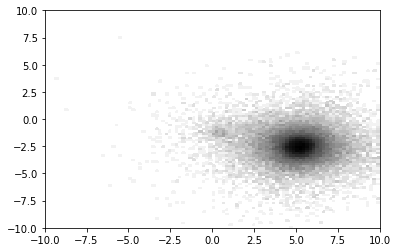

In [50]:
plt.hist2d(d['pmra'].dropna(), d['pmdec'].dropna(),
           bins=np.linspace(-10,10,101), norm=colors.LogNorm(), cmap='Greys');

In [5]:
from astroquery.gaia import Gaia

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
